In [1]:
from scipy.integrate import quad

import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import statistics


# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
                  (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
                  (255, 188, 121), (207, 207, 207)]

# Rescale to values between 0 and 1
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
for i in range(len(tableau20blind)):
    r, g, b = tableau20blind[i]
    tableau20blind[i] = (r / 255., g / 255., b / 255.)
    
def plt_style():
    plt.rcParams.update({
    'lines.linewidth':1.0,
    'lines.linestyle':'-',
    'lines.color':'black',
    'font.family':'serif',
    'font.weight':'normal',
    'font.size':16.0,
    'text.color':'black',
    'text.usetex':True,
    'axes.edgecolor':'black',
    'axes.linewidth':1.0,
    'axes.grid':False,
    'axes.titlesize':'large',
    'axes.labelsize':'large',
    'axes.labelweight':'normal',
    'axes.labelcolor':'black',
    'axes.formatter.limits':[-4,4],
    'xtick.major.size':7,
    'xtick.minor.size':4,
    'xtick.major.pad':8,
    'xtick.minor.pad':8,
    'xtick.labelsize':'large',
    'xtick.minor.width':1.0,
    'xtick.major.width':1.0,
    'ytick.major.size':7,
    'ytick.minor.size':4,
    'ytick.major.pad':8,
    'ytick.minor.pad':8,
    'ytick.labelsize':'large',
    'ytick.minor.width':1.0,
    'ytick.major.width':1.0,
    'legend.numpoints':1,
    'legend.fontsize':'large',
    'legend.shadow':False,
    'legend.frameon':False})



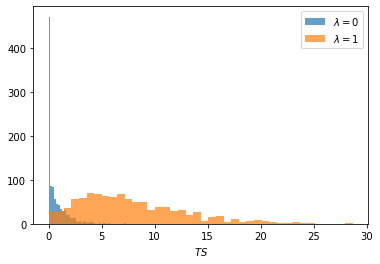

In [3]:
#Look at some TS distributions

Nfollowups=5

ts_0,ts=[],[]

for k in range(1000):
    lamb='0'
    file='out/TS_'+lamb+'_'+str(k)+'.dat'
    lnlikes=np.genfromtxt(file)
    ts_0.append(lnlikes[:Nfollowups].sum())
    
    lamb='1.0'
    file='out/TS_'+lamb+'_'+str(k)+'.dat'
    lnlikes=np.genfromtxt(file)
    ts.append(lnlikes[:Nfollowups].sum())

plt.hist(ts_0,bins=40,alpha=0.7,label='$\lambda=0$')
plt.hist(ts,bins=40,alpha=0.7,label='$\lambda=1$')
plt.xlabel('$TS$')
plt.legend()

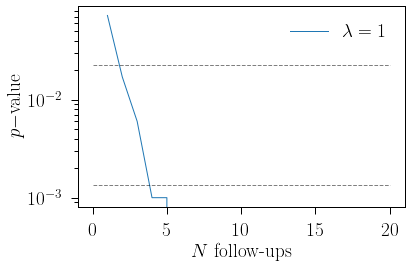

In [4]:
#Look at significance

Nfollowups=20
nsamples=1000
pvalue,xs=[],[]


for N in range(1,Nfollowups):
    ts_0,ts=[],[]
    #print('N followups:',N)
    for k in range(nsamples):
        #print(str(k))
        lamb='0'
        file='out/TS_'+lamb+'_'+str(k)+'.dat'
        lnlikes_0=np.genfromtxt(file)

        lamb='1.0'
        file_1='out/TS_'+lamb+'_'+str(k)+'.dat'
        lnlikes_1=np.genfromtxt(file_1)
        ts_0.append(lnlikes_0[:N].sum())
        ts.append(lnlikes_1[:N].sum())
    #print(ts_0)
    ts_0=np.array(ts_0)
    med=statistics.median(ts)
    mask=(ts_0>med)
    pv=ts_0[mask].shape[0]/float(nsamples)
    #print(ts)
    #print(pv,med,ts_0[mask])
    pvalue.append(pv)
    xs.append(N)
    
plt_style()
plt.plot(xs,pvalue,label='$\lambda=1$')
plt.xlabel('$N$ follow-ups')
plt.ylabel('$p-$value')
plt.legend()
s1=(1.-0.6827)/2.
s2=(1.-0.9545)/2.
s3=(1.-0.9973)/2.
#plt.plot([0,Nfollowups],[s1,s1],'k--',alpha=0.5)
plt.plot([0,Nfollowups],[s2,s2],'k--',alpha=0.5)
plt.plot([0,Nfollowups],[s3,s3],'k--',alpha=0.5)
plt.yscale('log')
plt.tight_layout()
plt.savefig('sims_pvalue.png',dpi=200)